# Class Waveform

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal
from wavewatson import Waveform
import numpy as np

t = np.linspace(0, 1, 10000, endpoint=False)
noise = np.random.normal(0, 0.1, len(t))
#noise = np.zeros(len(t))

## Construct waveforms

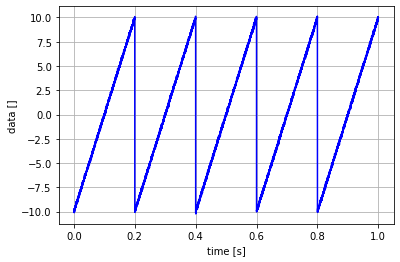

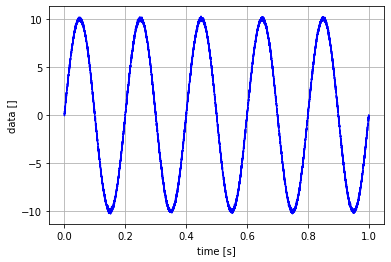

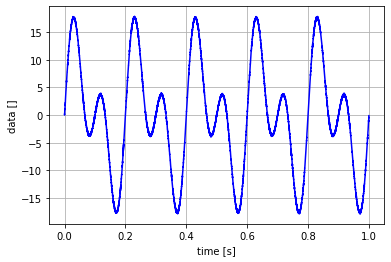

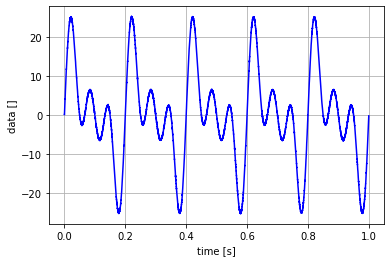

Waveform --> Name:wave_001, Length:10000, SampleRate:1.000e+04, Tstart: 0.000e+00, Tstop:9.999e-01
Samplerate sine3: 10000.000000
Length sine3: 10000
Type of sine3: Waveform


In [2]:
saw = Waveform(time=t, data=10 * signal.sawtooth(2 * np.pi * 5 * t) + noise)
saw.plot()

sine1 = Waveform(time=t, data=10 * np.sin(2 * np.pi * 5 * t) + noise)
sine1.plot()

sine2 = Waveform(time=t, data=10 * np.sin(2 * np.pi * 10 * t)) + sine1
sine2.plot()

sine3 = Waveform(time=t, data=10 * np.sin(2 * np.pi * 15 * t))
sine3 += sine2
sine3.plot()

print(sine3)
print("Samplerate sine3: %f" % sine3.samplerate)
print("Length sine3: %d" % sine3.length)  # also: len(sine3)
print("Type of sine3: %s" % sine3.type)

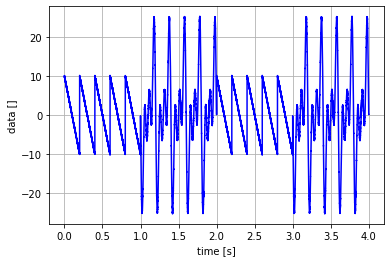

In [3]:
# Copy waveform
# wave4 = sine3 just copies the reference so wave4 and sine3 point to the same object
wave4 = sine3.copy()
wave4.extend(saw).mirror().repeat(2).plot()

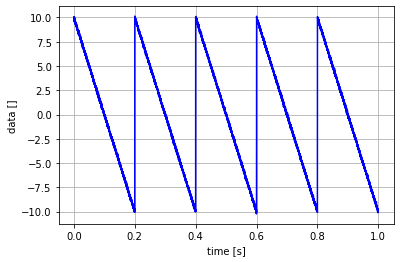

In [7]:
# Flip waveform data vector
saw.mirror().plot()

## Arithmetical operations

Add, Sub, Mul, Div, Mod, Abs, Inv, Pow

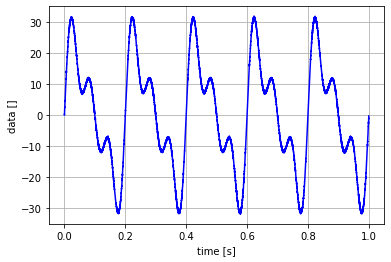

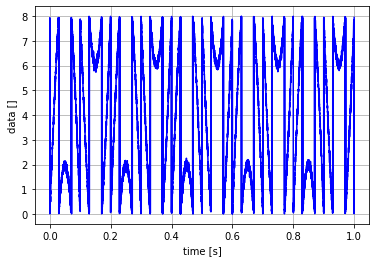

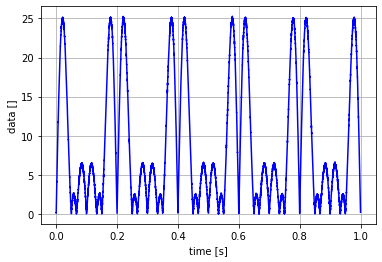

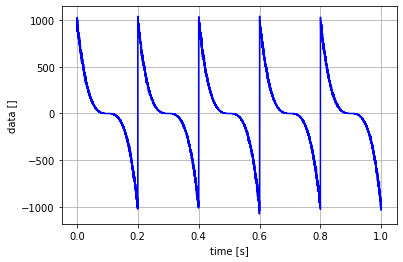

In [8]:
(sine1 + sine3).plot()
saw - sine1
saw * sine1
saw / sine1

saw + 2
saw - 1
saw * 2
saw / 2.5

(sine1 % 8).plot()
abs(sine3).plot()
(saw**3).plot()

## Mathematical operations

round, round_towards_zero, floor, ceil, truncate, derivate, integrate, derivate

Sine sum: -8.954441


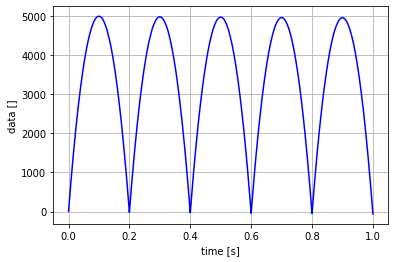

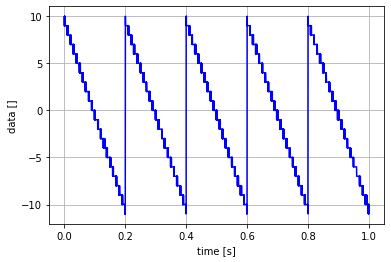

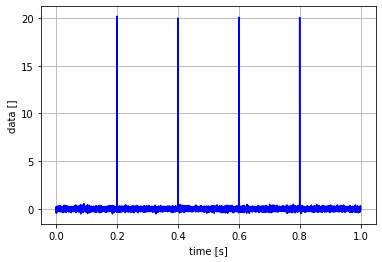

Integral from 0 to 1s: -0.005901


In [9]:
tmp = saw.copy()

print("Sine sum: %f" % (sine3.Math.sum()))
saw.Math.cumsum().plot()

tmp.Math.floor().plot()
#tmp.Math.ceil()
#tmp.Math.truncate()
#tmp.Math.round()
#tmp.Math.round_towards_zero()

saw.Math.derivate(1).plot()
print("Integral from 0 to 1s: %f" % saw.Math.integrate(order=1))

## Compare waveforms

In [10]:
print(sine1 > -10)
print(sine1 >= -11)
print(sine1 < 11)
print(sine1 != sine2)
print(sine1 == sine1)
print(saw[0.1:0.2] > sine1[0.1:0.2])

False
True
True
True
True
False


## Edit & slice waveform

### Slicing (GET)

There are 4 different slicing methods:

- Slice with scalar (index or time)
- Slice with tuple (index or time)
- Slice with list/array (index or time)
- Slice with Slice notation [START:STOP:STEP] (index or time)

To slice by **index** use **INT**s as parameters, to slice by **time** use **FLOAT**s.
If start & stop are not both FLOATs, they are converted to INTs.

In [11]:
tmp = sine1.copy()

#### Slice with scalar

In [12]:
print(sine1[500])  # Index
print(sine1[0.05])  # Time

10.031114886362017
10.031114886362017


#### Slice with tuple

In [13]:
print(sine1[0,500,1000])
print(sine1[0.0, 0.05, 0.1])

[ 0.13459363 10.03111489 -0.1300249 ]
[0.1345936257296438, 10.031114886362017, -0.13002489887136748]


#### Slice with list/array

In [17]:
print(sine1[[0,500,1000]])
print(sine1[np.array([0,500,1000], dtype=int)])

print(sine1[[0.0, 0.05, 0.1]])
print(sine1[np.array([0.0, 0.05, 0.1], dtype=np.float64)])

[ 0.13459363 10.03111489 -0.1300249 ]
[ 0.13459363 10.03111489 -0.1300249 ]
[0.1345936257296438, 10.031114886362017, -0.13002489887136748]
[0.1345936257296438, 10.031114886362017, -0.13002489887136748]


#### Slice with Slice notation

In [18]:
# Index (INTS)
print(sine1[0:1000]) # Get waveform from index 0 to 1000
print(sine1[0:1000:4])  # Get waveform from 0 to 1000 taking each 4. value
print(sine1[1000:0:-1])  # Get waveform from 1000 to 0. Equal to sine1[0:1000][::-1]
print(sine1[:2000])  # Get waveform from start to index 2000
print(sine1[1000:])  # Get waveform from index 1000 to end
 # Negative start/stop values only work with indices
print(sine1[:-1000])  # Get waveform from start to end - 1000
print(sine1[-1000:])  # Get waveform from end - 1000 to end
print(sine1[-1000::-1])  # Get waveform from end - 1000 to start

# Time (FLOATS)
print(sine1[0.0:0.1]) # Get waveform from time 0s to 0.1s
print(sine1[0.0:0.1:4])  # Get waveform from time 0s to 0.1s taking each 4. value
print(sine1[::-1])  # Invert data vector see equal sine1.flip().
print(sine1[0.1:0.0:-1])  # Get waveform from time 0.1s to 0s. Equal to sine1[0.0:0.1][::-1]
print(sine1[:0.2])  # Get waveform from start to time 0.2s
print(sine1[0.1:])  # Get waveform from time 0.1s to end

Waveform --> Name:wave_000, Length:1000, SampleRate:1.000e+04, Tstart: 0.000e+00, Tstop:9.990e-02
Waveform --> Name:wave_000, Length:250, SampleRate:2.500e+03, Tstart: 0.000e+00, Tstop:9.960e-02
Waveform --> Name:wave_000, Length:1000, SampleRate:1.000e+04, Tstart: 1.000e-01, Tstop:1.000e-04
Waveform --> Name:wave_000, Length:2000, SampleRate:1.000e+04, Tstart: 0.000e+00, Tstop:1.999e-01
Waveform --> Name:wave_000, Length:9000, SampleRate:1.000e+04, Tstart: 1.000e-01, Tstop:9.999e-01
Waveform --> Name:wave_000, Length:9000, SampleRate:1.000e+04, Tstart: 0.000e+00, Tstop:8.999e-01
Waveform --> Name:wave_000, Length:1000, SampleRate:1.000e+04, Tstart: 9.000e-01, Tstop:9.999e-01
Waveform --> Name:wave_000 (empty)
Waveform --> Name:wave_000, Length:1001, SampleRate:1.000e+04, Tstart: 0.000e+00, Tstop:1.000e-01
Waveform --> Name:wave_000, Length:251, SampleRate:2.500e+03, Tstart: 0.000e+00, Tstop:1.000e-01
Waveform --> Name:wave_000 (empty)
Waveform --> Name:wave_000, Length:999, SampleRate

### Slicing (SET)

There are 3 different methods to set the data of a slice:

- Set a scalar
- Set an array
    - Length of array longer than slice -> Intepolation
    - Length of array equal to slice
    - Length of array less than slice -> Intepolation
- Set a waveform

#### Set scalar

[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


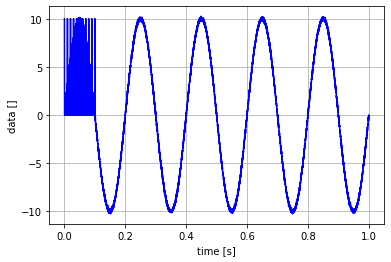

In [19]:
sine1 = tmp.copy()
sine1[1] = 0
sine1[2,3,4] = 0
sine1[[5,6,7]] = 0
sine1[np.array([8,9,10])] = 0
sine1[0:1000:2] = 0
sine1[0.0:0.1:100] = 10  # Set every 100th point from 0.0 to 0.1s to 10
print(sine1[np.arange(11)])
sine1.plot()

#### Set list/array

[ 0.13459363 -0.06333251 10.         20.         30.         10.
 20.         30.         10.         20.         30.        ]
[ 0.13459363 -0.06333251 10.         20.         30.         10.
 20.         30.         10.         20.         30.        ]
[ 0.13459363 -0.06333251 10.         20.         30.         10.
 20.         30.         10.         20.         30.        ]


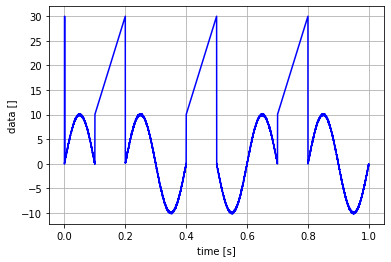

In [20]:
sine1 = tmp.copy()
sine1[2,3,4] = [10, 20, 30]  # also np.array([10, 20, 30]) possible
sine1[[5,6,7]] = [10, 20, 30]
sine1[np.array([8,9,10])] = [10, 20, 30]
sine1[1000:2000] = [10, 20, 30]
sine1[0.1:0.2] = [10, 20, 30]
print(sine1[np.arange(11)])

# Interpolate if too less points are given
sine1[2,3,4] = [10, 30]
sine1[[5,6,7]] = [10, 30]
sine1[np.array([8,9,10])] = [10, 30]
sine1[4000:5000] = [10, 30]
sine1[0.4:0.5] = [10, 30]
print(sine1[np.arange(11)])

# Interpolate if too many points are given
sine1[2,3,4] = [10, 15, 20, 25, 30]
sine1[[5,6,7]] = [10, 15, 20, 25, 30]
sine1[np.array([8,9,10])] = [10, 15, 20, 25, 30]
sine1[7000:8000] = [10, 15, 20, 25, 30]
sine1[0.7:0.8] = [10, 15, 20, 25, 30]
print(sine1[np.arange(11)])

sine1.plot()

#### Set waveform

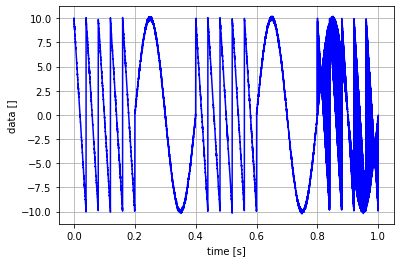

In [21]:
sine1 = tmp.copy()
sine1[np.arange(2000)] = saw
sine1[0.4:0.6] = saw
sine1[0.8::2] = saw
sine1.plot()

### Interpolating

In [17]:
# Interpolate single point
print(sine1[0.012345])
# same as
print(sine1.at_time(0.012345))
# or
print(sine1.interpolate(0.012345))

3.8457941457
3.8457941457
3.8457941457


Start a: 0.012400
Stop  a: 0.023400
Start b: 0.012340
Stop  b: 0.023450


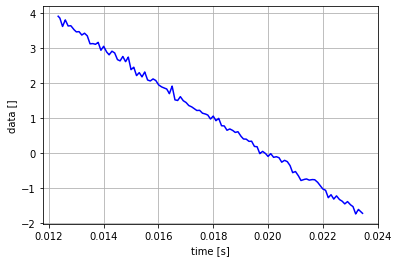

In [22]:
# Interpolate multiple points -> Waveform returned

# Wrong!
a = sine1[0.01234:0.02345]  # This is a slice and only takes the nearest existing point before 0.01234 and 0.02345
print("Start a: %f" % a.time[0])
print("Stop  a: %f" % a.time[-1])

# Right!
b = sine1.interpolate(np.linspace(0.01234, 0.02345, 10000))
print("Start b: %f" % b.time[0])
print("Stop  b: %f" % b.time[-1])
b.plot()

### Splitting

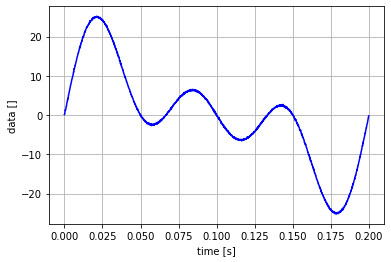

In [23]:
waves = sine3.split_by_times([0.2, 0.4, 0.6, 0.8])
a,b,c,d,e = sine3.split_by_indices([2000, 4000, 6000, 8000])
a.plot()
# or slice waveform

### Time shifting

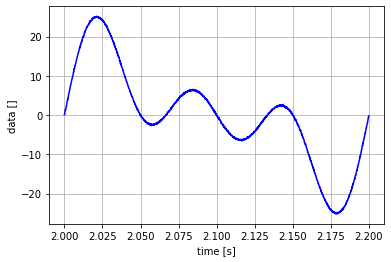

In [24]:
# Shift waveform in time
a.time_shift(timeoffset=1.0)
# same as:
a.time += 1.0
# If time vector is changed manually this has to be called to recalculate the samplerate/length etc. despite in this case
# none of the two properties is changing
a._recalc_attributes()

a.plot()

### Windowing

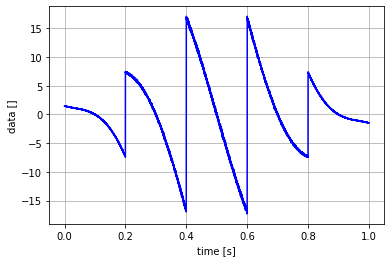

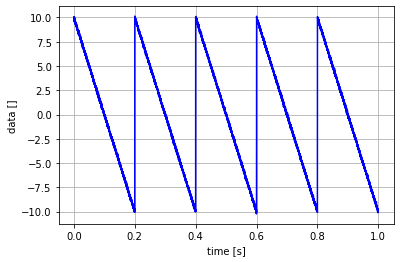

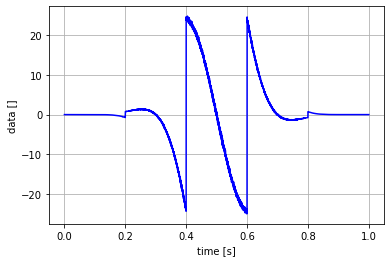

In [25]:
# Apply a window for a following fft
a = saw.copy()
b = saw.copy()
a.apply_window("hamming")  # Normal hamming window
a.plot()

a.apply_inverse_window("hamming")  # Inverse hamming window
a.plot()

b.apply_window(("kaiser", 20))  # Kaiser window with beta=20
b.plot()

## Store & reload waveforms

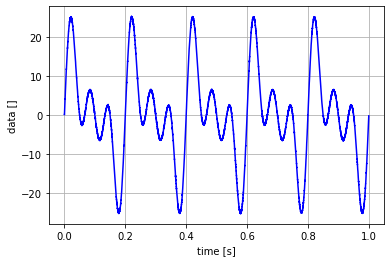

In [28]:
sine3.save_to_file(filepath=r"C:/temp/sine3.npz")
a = Waveform.load_from_file(filepath=r"C:/temp/sine3.npz")  # Static method of waveform class
a.plot()

## Resampling methods

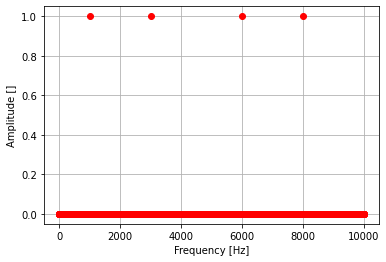

In [29]:
t = np.linspace(0,1,20000, endpoint=False)
s1 = 1 * np.sin(2 * np.pi * 1000 * t)
s2 = 1 * np.sin(2 * np.pi * 3000 * t)
s3 = 1 * np.sin(2 * np.pi * 6000 * t)
s4 = 1 * np.sin(2 * np.pi * 8000 * t)
w = Waveform(time=t, data=s1+s2+s3+s4)
w.fft().plot()

### Upsample

Waveform --> Name:wave_057, Length:100000, SampleRate:1.000e+05, Tstart: 0.000e+00, Tstop:1.000e+00


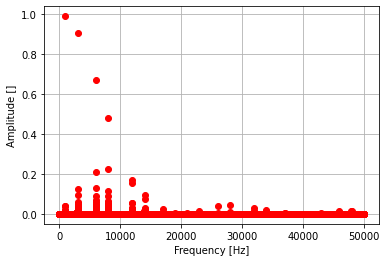

In [31]:
w.up_sample_interp(nr_points=100000)  # or w.up_sample_interp(factor=5)
print(w)
w.fft().plot()

### Downsample

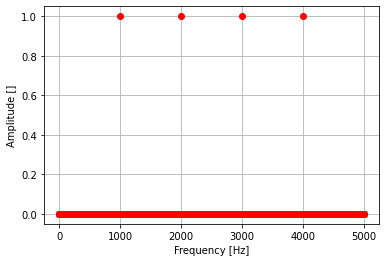

In [32]:
w = Waveform(time=t, data=s1+s2+s3+s4)

# Downsampling is not aliasing-safe
w.down_sample(nr_points=10000)  # or w.down_sample(factor=2)
w.fft().plot()
# Frequencies at 6000 Hz and 8000 Hz are mirror at the sampling frequency 
# and folded into the the new frequency range at 2000 Hz and 4000 Hz

### Decimate

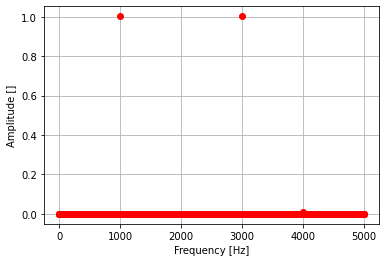

In [33]:
w = Waveform(time=t, data=s1+s2+s3+s4)

# Downsampling is nearly aliasing-safe (depending on the slope of the aliasing filter)
w.decimate(nr_points=10000)  # or w.decimate(factor=2)
w.fft().plot()
# Frequencies at 6000 Hz and 8000 Hz are cut off and not
# folded into the the new frequency range

## Fourier transformation

### FFT / IFFT (no windowing)

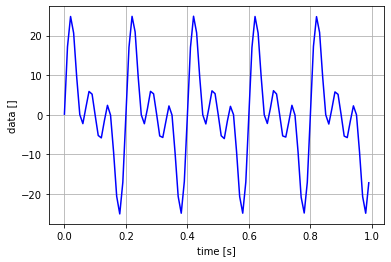

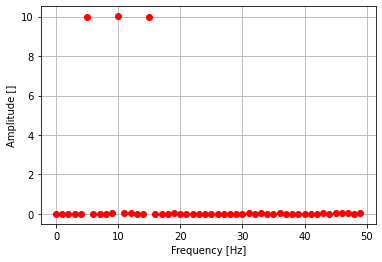

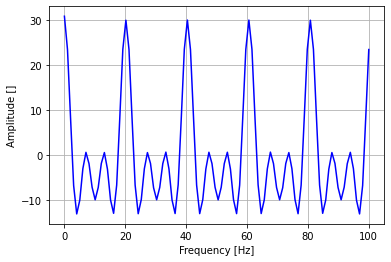

In [34]:
w = sine3.copy()
w.down_sample(100)
w.plot()

# Do FFT
f = w.fft()
f.plot()

# Do Inverse FFT
f.ifft().plot()

### FFT / IFFT (windowing method 1)

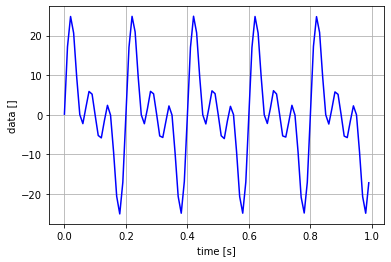

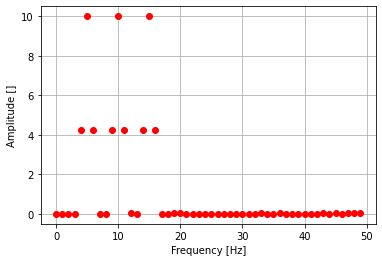

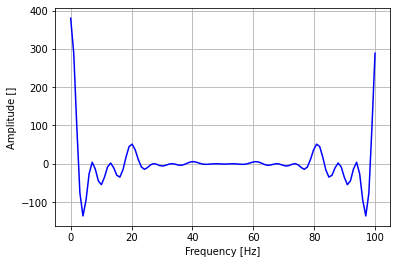

In [35]:
w = sine3.copy()
w.down_sample(100)
w.plot()


# Do FFT
f = w.fft("hamming")
f.plot()

# Do Inverse FFT
f.ifft("hamming").plot()

### FFT / IFFT (windowing method 2)

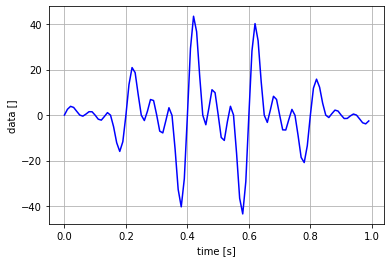

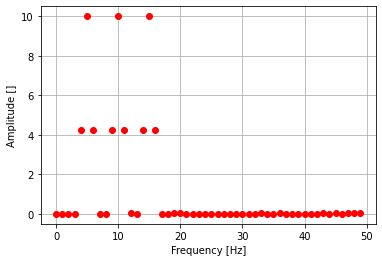

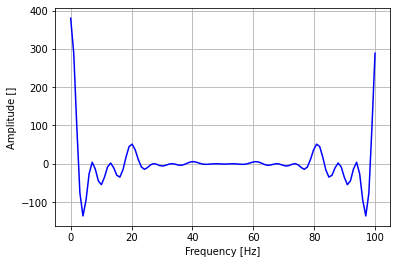

In [36]:
w = sine3.copy()
w.down_sample(100)

# Apply window manually
w.apply_window("hamming", div_by_win_mean=1)
w.plot()

# Do FFT
f = w.fft()
f.plot()

# Do Inverse FFT
w = f.ifft()
w.apply_inverse_window("hamming", mult_by_win_mean=1)

w.plot()

## Histogram

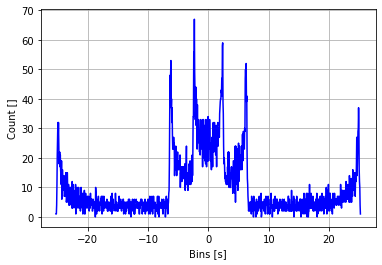

In [37]:
h = sine3.histogram(bins=1000)
h.plot(config="b-")

## Utility Methods

In [38]:
print(sine1.index_to_time(1000))
print(sine1.index_to_time([1000, 2000, 3000, 4000]))

print(sine1.time_to_index(0.100010001))
print(sine1.time_to_index([0.10001000100010002, 0.20002000200020004, 0.30003000300030003, 0.40004000400040007]))

0.1
1001
